In [4]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split

In [23]:
# data
y = np.genfromtxt('affected_NAPair.txt')
X = pd.read_csv('endo_NAdroped_cols_to_reduce.csv')

# demean and scale
X_vals = X.values
X_vals = X_vals - X_vals.mean(0)
X_vals = X_vals * 1./X_vals.std(0)

# split for training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_vals, y, test_size = .3, random_state = 1
)

In [185]:
acc_arr = []
for crit in ['entropy','gini']:
    for i in range(20):
        rf_clf = RandomForestClassifier(
            criterion = crit,
            n_estimators = 800,
            max_depth=i+1,
            random_state=2
        )
        rf_clf.fit(X_train, y_train)
        prediction = rf_clf.predict(X_test)
        feature_importance = rf_clf.feature_importances_
        acc = sum(np.where(prediction == y_test,1,0)) / float(len(y_test))
        acc_arr.append((acc, i, crit))

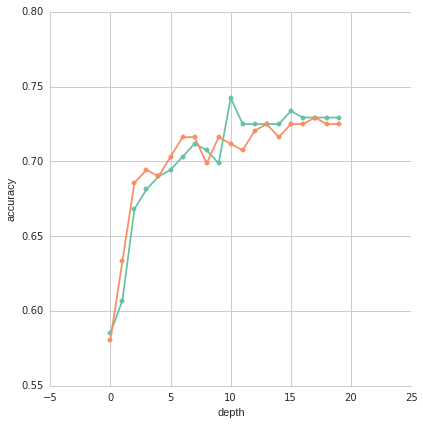

In [256]:
acc_df = pd.DataFrame(
    {'accuracy':[x[0] for x in acc_arr],
     'depth':[x[1] for x in acc_arr],
     'criti':[x[2] for x in acc_arr]}
)
% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
g = sns.FacetGrid(acc_df, hue="criti", size=6,palette="Set2")
g.map(plt.scatter, "depth", "accuracy")
g.map(plt.plot, "depth", "accuracy")

In [260]:
acc_arr2 = []
for crit in ['entropy','gini']:
    for x in range(100,2000,100):
        rf_clf = RandomForestClassifier(
            criterion = crit,
            n_estimators = x,
            max_depth=18,
            random_state=2
        )
        rf_clf.fit(X_train, y_train)
        prediction = rf_clf.predict(X_test)
        feature_importance = rf_clf.feature_importances_
        acc = sum(np.where(prediction == y_test,1,0)) / float(len(y_test))
        acc_arr2.append((acc, x, crit))

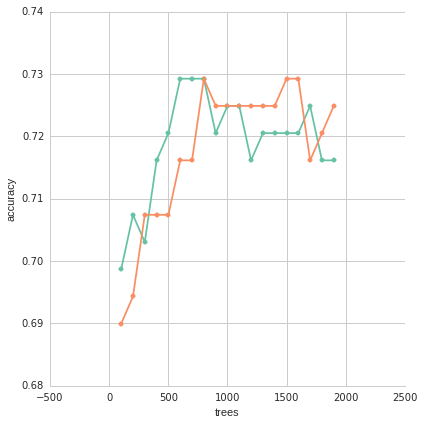

In [264]:
acc_df2 = pd.DataFrame(
    {'accuracy':[x[0] for x in acc_arr2],
     'trees':[x[1] for x in acc_arr2],
     'criti':[x[2] for x in acc_arr2]}
)
% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
g = sns.FacetGrid(acc_df2, hue="criti", size=6,palette="Set2")
g.map(plt.scatter, "trees", "accuracy")
g.map(plt.plot, "trees", "accuracy")